In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

(891, 12)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [9]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [10]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [11]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

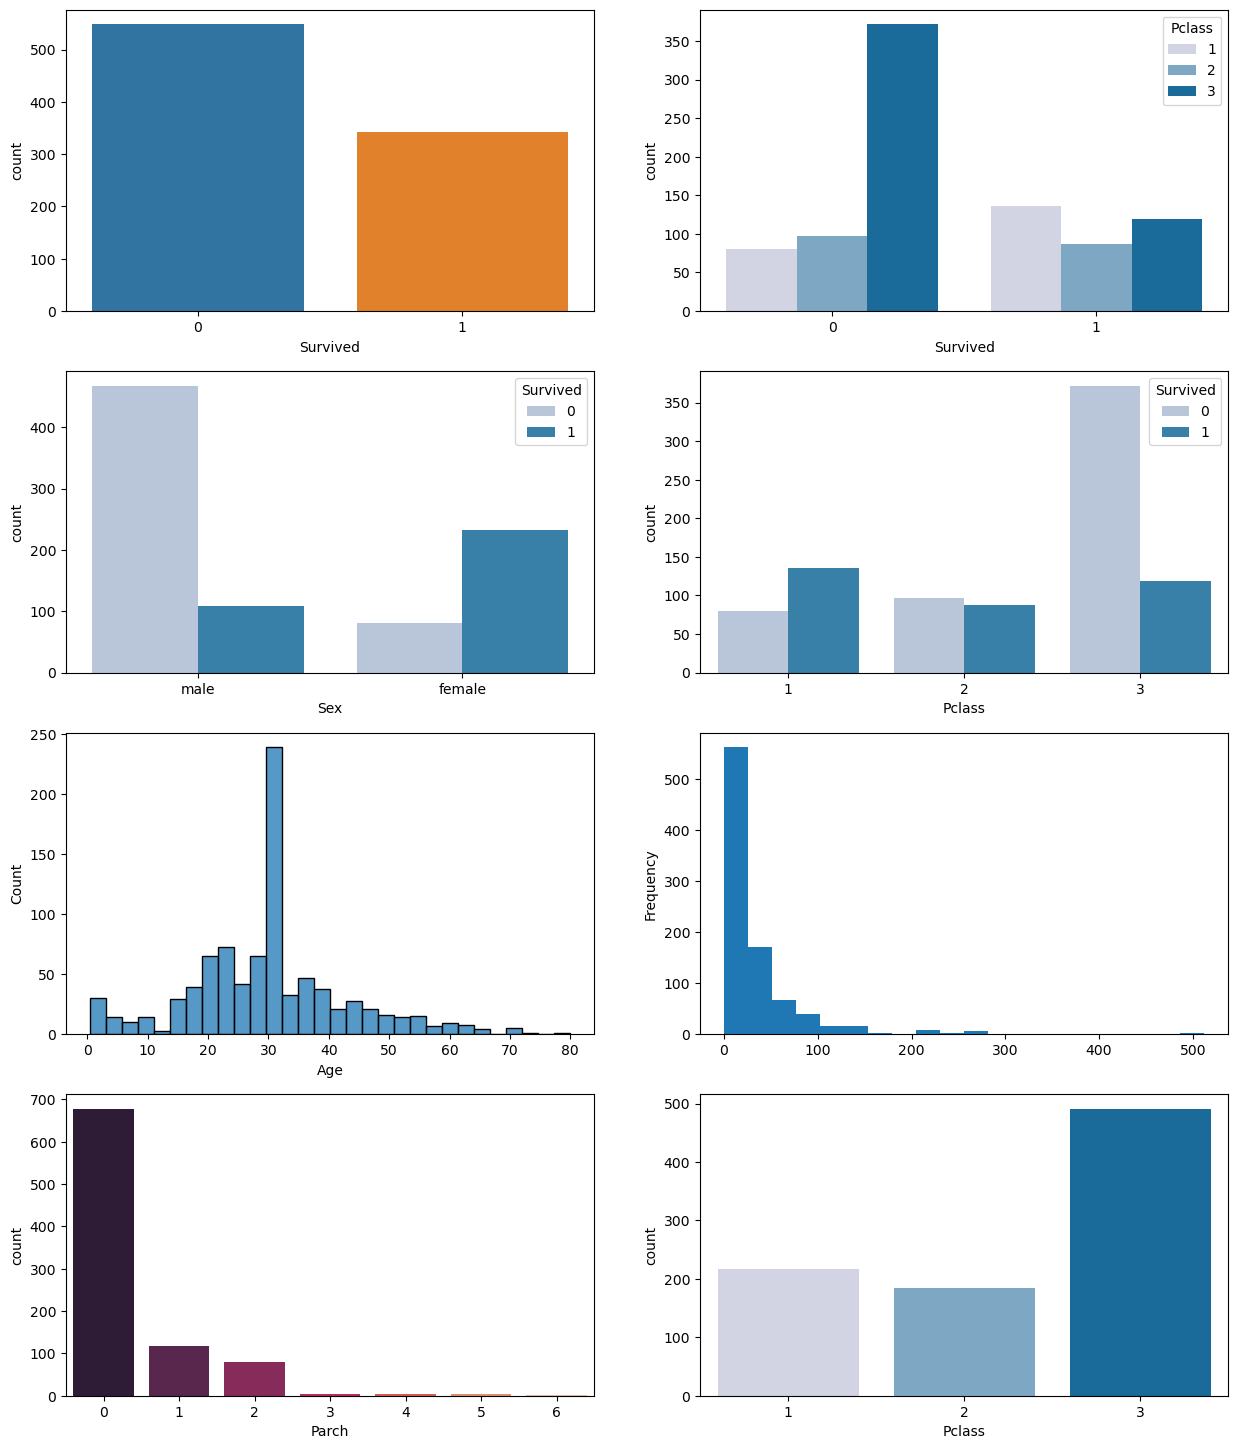

In [12]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,18))

sns.countplot(x='Survived',data=data,ax=axes[0,0])
sns.countplot(x='Survived',hue='Pclass',data=data,palette='PuBu',ax=axes[0,1])
sns.countplot(x='Sex',hue='Survived',data=data,palette='PuBu',ax=axes[1,0])
sns.countplot(x='Pclass',hue='Survived',data=data,palette='PuBu',ax=axes[1,1])
sns.histplot(data=data['Age'],ax=axes[2,0])
data['Fare'].plot.hist(bins=20,ax=axes[2,1])
sns.countplot(x='Parch',data=data,palette='rocket',ax=axes[3,0])
sns.countplot(x='Pclass',data=data,palette='PuBu',ax=axes[3,1])

<Figure size 1600x1600 with 0 Axes>

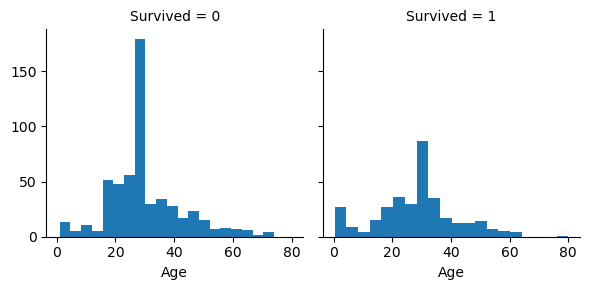

In [15]:
figs=plt.figure(figsize=(16,16))
sns.FacetGrid(data,col='Survived').map(plt.hist,'Age',bins=20)

In [16]:
data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [19]:
data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
data['Sex']=np.where(data['Sex']=='female',1,0)
data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [21]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [22]:
train,test=train_test_split(data,test_size=0.2)

In [23]:
data.replace({'Sex':{'male':0,'female':1}},inplace=True)
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [29]:
train,test=train_test_split(data,test_size=0.2)

In [30]:
train_x=train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train_y=train[['Survived']]

test_x=test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test_y=test[['Survived']]

In [31]:
linear=LinearRegression()
linear.fit(train_x,train_y)
predct=linear.predict(test_x)
metrics.r2_score(test_y,predct)

0.42447719742618384

In [32]:
linear=LogisticRegression()
linear.fit(train_x,train_y)
predct=linear.predict(test_x)
accuracy_score(test_y,predct)

0.8100558659217877

In [33]:
DTC=DecisionTreeClassifier()
DTC.fit(train_x,train_y)
predct=DTC.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.7541899441340782

In [34]:
KNC=RandomForestClassifier()
KNC.fit(train_x,train_y)
predct=KNC.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.776536312849162

In [35]:
KNC=KNeighborsClassifier()
KNC.fit(train_x,train_y)
predct=KNC.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.7039106145251397

In [36]:
KNC=GaussianNB()
KNC.fit(train_x,train_y)
predct=KNC.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.7877094972067039